<a href="https://colab.research.google.com/github/hanifabd/Indonesian-Education-Facilities-Per-District-Using-Geopandas/blob/main/Indonesian_Education_Facilities_Per_District_Using_Geopandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Indonesian Education Facilities Per District Using Geopandas
- Education Facilities Dataset : https://drive.google.com/file/d/1-8vuQ0S2FO4KgpA09og5bTOogKa8L1VZ/view?usp=sharing or https://data.humdata.org/dataset/indonesia-education-facilities

- ID Map :
https://drive.google.com/file/d/1MJUl7MzQ0iEcm7qV7Ci1C0-MDYkk5lUd/view?usp=sharing

In [88]:
# ! pip install geopandas
import geopandas as gpd
from shapely.geometry import Point
import matplotlib.pyplot as plt

In [68]:
df = gpd.read_file('/content/drive/My Drive/Data Science/Self Project/Indonesian Education Visualization/IDN_school_facilities/IDN_school_facilities.shp')
df.head(2)

,PROVINCE,DISTRICT,SUB-DISTRI,VILLAGE,VILLAGE PC,ADDRESS,Longitude,Latitude,LEVEL,NAME,geometry
0,Prov. Jawa Timur,Kota Surabaya,Kec. Genteng,Embong Kaliasin,3.578190e+09,Jl. Embong Blimbing No. 40,112.7395,-7.2716,Elementary School (SD),SD NEGERI KALIASIN VII 286,POINT (112.73950 -7.27160)
1,Prov. Riau,Kab. Kuantan Singingi,Kec. Kuantan Hilir Seberang,Rawang Oguang,1.401052e+09,Jl. Datuk Pinang Baribut Desa Rawang Oguong PT...,101.6784,-0.3796,Elementary School (SD),SD SWASTA CERENTI SUBUR,POINT (101.67840 -0.37960)


In [69]:
bubble = df.groupby('DISTRICT', as_index=False)[['Longitude','Latitude']].mean()
bubble.head()

,DISTRICT,Longitude,Latitude
0,KAB. MAHAKAM ULU,115.076825,0.615232
1,KAB. MALAKA,124.839779,-9.660974
2,KAB. PANGANDARAN,108.597575,-7.655625
3,Kab. Aceh Barat,96.126455,4.295508
4,Kab. Aceh Barat Daya,96.837886,3.749662


In [71]:
# creating a geometry column 
geometry = [Point(xy) for xy in zip(point['Longitude'], point['Latitude'])]

# Coordinate reference system : WGS84
crs = {'init': 'epsg:4326'}

# Creating a Geographic data frame 
gdf = gpd.GeoDataFrame(bubble, crs=crs, geometry=geometry)
gdf.head()

/usr/local/lib/python3.6/dist-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


,DISTRICT,Longitude,Latitude,geometry
0,KAB. MAHAKAM ULU,115.076825,0.615232,POINT (115.07683 0.61523)
1,KAB. MALAKA,124.839779,-9.660974,POINT (124.83978 -9.66097)
2,KAB. PANGANDARAN,108.597575,-7.655625,POINT (108.59757 -7.65562)
3,Kab. Aceh Barat,96.126455,4.295508,POINT (96.12646 4.29551)
4,Kab. Aceh Barat Daya,96.837886,3.749662,POINT (96.83789 3.74966)


In [72]:
school = df.groupby('DISTRICT', as_index=False)['ADDRESS'].count()
school = school.rename(columns={'ADDRESS':'School_Facilities'})
school.head()

,DISTRICT,School_Facilities
0,KAB. MAHAKAM ULU,3
1,KAB. MALAKA,2
2,KAB. PANGANDARAN,8
3,Kab. Aceh Barat,240
4,Kab. Aceh Barat Daya,157


In [73]:
# JOIN SCHOOL AND MAP
df = gdf.merge(school, how='inner', on='DISTRICT')
df = df.sort_values('School_Facilities', ascending=False)
df.head()

,DISTRICT,Longitude,Latitude,geometry,School_Facilities
64,Kab. Bogor,106.778137,-6.529422,POINT (106.77814 -6.52942),2992
99,Kab. Garut,107.857925,-7.264356,POINT (107.85792 -7.26436),2254
20,Kab. Bandung,107.656432,-7.032124,POINT (107.65643 -7.03212),2018
83,Kab. Cianjur,107.145314,-6.990719,POINT (107.14531 -6.99072),1803
358,Kab. Sukabumi,106.745935,-7.007275,POINT (106.74593 -7.00728),1766


In [75]:
df_geo = gpd.read_file('/content/drive/My Drive/Data Science/Self Project/Indonesian Education Visualization/gadm36_IDN_1.json')
df_geo = df_geo[['NAME_1','geometry']]
df_geo.head()

,NAME_1,geometry
0,Aceh,"MULTIPOLYGON (((96.66509 2.12018, 96.66765 2.1..."
1,Bali,"MULTIPOLYGON (((115.59464 -8.81672, 115.59444 ..."
2,Bangka Belitung,"MULTIPOLYGON (((107.96173 -3.41100, 107.96220 ..."
3,Banten,"MULTIPOLYGON (((105.54977 -6.99566, 105.55035 ..."
4,Bengkulu,"MULTIPOLYGON (((102.37586 -5.36968, 102.38067 ..."


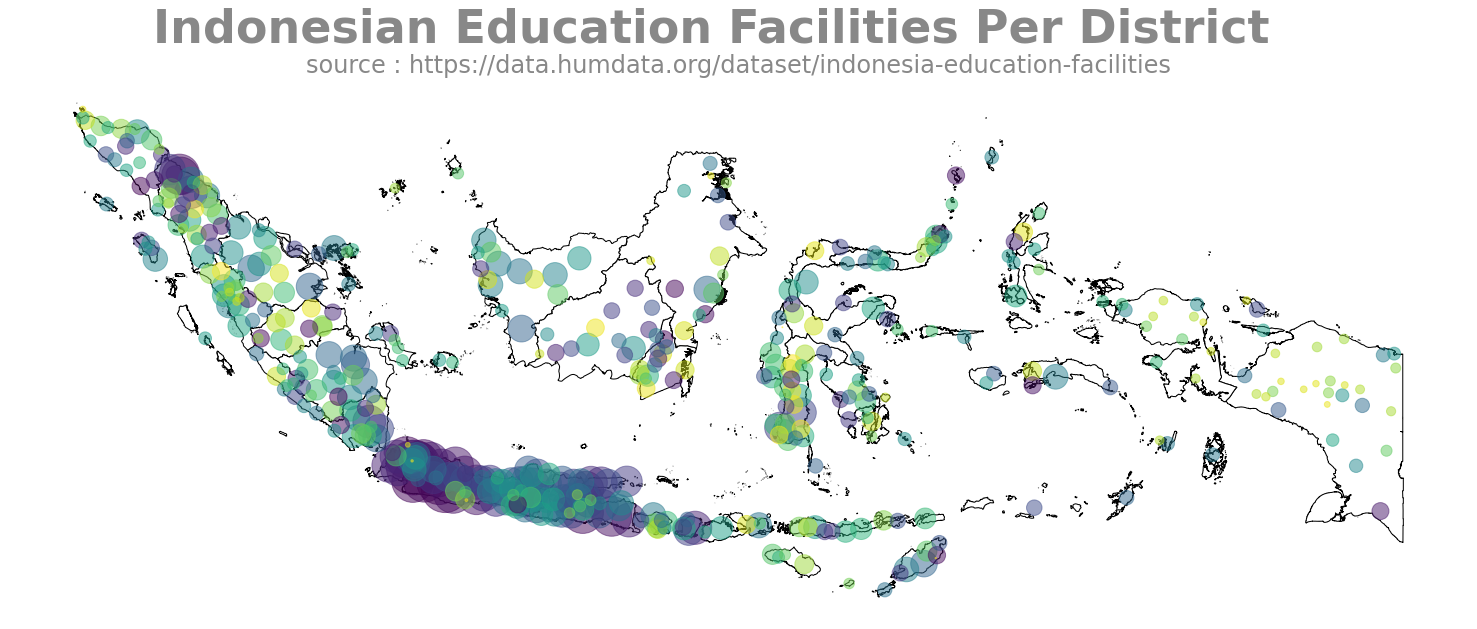

In [115]:
base = df_geo.plot(figsize=(30,10),
                   color='white', 
                   edgecolor='black')
base.axis('off')

df.plot(ax=base, 
        alpha=0.5,
        cmap = plt.get_cmap('viridis'),
        markersize='School_Facilities');

plt.suptitle('Indonesian Education Facilities Per District', fontsize=46, fontweight='bold', c='#888888')
plt.title('source : https://data.humdata.org/dataset/indonesia-education-facilities', fontsize=24, c='#888888')
plt.show()